In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")
X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

In [16]:
X_train.head()
Y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [19]:
X_train = X_train.drop("Id", axis=1)
Y_train = Y_train.drop("Id", axis=1)
X_test = X_test.drop("Id", axis=1)
Y_test = Y_test.drop("Id", axis=1)

In [20]:
X_train = X_train.values
Y_train = Y_train.values
X_test =  X_test.values
Y_test = Y_test.values

In [21]:
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.reshape(1, X_train.shape[1])
Y_test = Y_test.reshape(1, X_test.shape[1])


In [22]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7, 891)
(1, 891)
(7, 418)
(1, 418)


In [23]:
a = [[2,3,7],[4,5,6]]
np.array(a).shape

(2, 3)

In [24]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [28]:
def model(X, Y, learningRate, iterations):
    cost_list = []
    m = X_train.shape[1]
    n = X_train.shape[0]
    W = np.zeros((n,1))
    B = 0
    
    for i in range(iterations):
        z = np.dot(W.T, X) + B
        a = sigmoid(z)
        
        cost = -(1/m)*np.sum(Y*np.log(a)+(1-Y)*np.log(1-a))
        dW = (1/m)*np.dot(a-Y, X.T)
        dB = (1/m)*np.sum(a-Y)
        cost_list.append(cost)
        
        W = W-learningRate*dW.T
        B = B-learningRate*dB
        if (i%(iterations/10) == 0):
            print("cost after",i, "is", cost)
    return W,B,cost_list
        
        
        

In [74]:
iterations = 10000
#learningRate = 0.0043
learningRate = 0.005
W,B,cost_list = model(X_train, Y_train, learningRate=learningRate, iterations=iterations)

cost after 0 is 0.6931471805599454
cost after 1000 is 0.6086767805723816
cost after 2000 is 0.5637411284619922
cost after 3000 is 0.5335847267892616
cost after 4000 is 0.5126437091140454
cost after 5000 is 0.4979752503415579
cost after 6000 is 0.48759958368738704
cost after 7000 is 0.48016703349462503
cost after 8000 is 0.4747629208491926
cost after 9000 is 0.4707695782931002


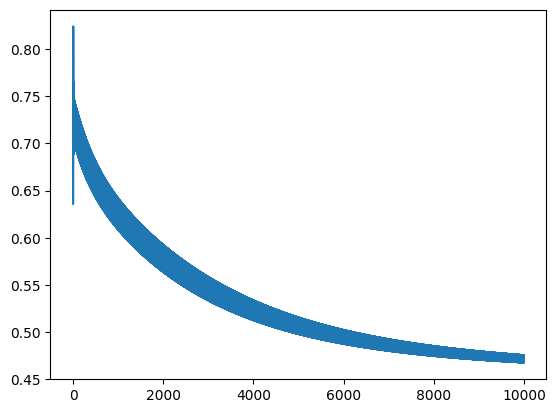

In [75]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [67]:
def accuracy(X,Y,W,B):
    z = np.dot(W.T, X) +B
    A = sigmoid(z)
    A = A>0.5
    A = np.array(A, dtype='int64')
    acc = (1- np.sum(np.absolute(A-Y))/Y.shape[1])*100
    print(acc)

In [68]:
accuracy(X_test, Y_test, W, B)

90.43062200956938
